https://www.helpfulgames.com/subjects/brain-training/sliding-puzzle.html

I. Introduction
The N-puzzle game consists of a board holding N = m2 − 1 distinct movable tiles, plus one empty space. There is one tile for each number in the set {0, 1,..., m2 − 1}. In this assignment, we will represent the blank space with the number 0 and focus on the m = 3 case (8-puzzle).
In this combinatorial search problem, the aim is to get from any initial board state to the configuration with all tiles arranged in ascending order {0, 1,..., m2 − 1} – this is your goal state. The search space is the set of all possible states reachable from the initial state. Each move consists of swapping the empty space with a component in one of the four directions {‘Up’, ‘Down’, ‘Left’, ‘Right’}. Give each move a cost of one. Thus, the total cost of a path will be equal to the number of moves made.


In [ ]:
from __future__ import division
from __future__ import print_function

import sys
import math
import time
from queue import Queue, PriorityQueue

import resource


Fill in move_down and move_right

In [ ]:
class PuzzleState(object):
    """
        The PuzzleState stores a board configuration and implements
        movement instructions to generate valid children.
    """
    def __init__(self, config, n, parent=None, action="Initial", cost=0):
        """
        :param config->List : Represents the n*n board, for e.g. [0,1,2,3,4,5,6,7,8] represents the goal state.
        :param n->int : Size of the board
        :param parent->PuzzleState
        :param action->string
        :param cost->int
        """
        if n*n != len(config) or n < 2:
            raise Exception("The length of config is not correct!")
        if set(config) != set(range(n*n)):
            raise Exception("Config contains invalid/duplicate entries : ", config)

        self.n        = n
        self.cost     = cost
        self.parent   = parent
        self.action   = action
        self.config   = config
        self.children = []

        # Get the index and (row, col) of empty block
        self.blank_index = self.config.index(0)

    def display(self):
        """ Display this Puzzle state as a n*n board """
        for i in range(self.n):
            print(self.config[3*i : 3*(i+1)])

    def move_up(self):
        """ 
        Moves the blank tile one row up.
        :return a PuzzleState with the new configuration
        """

        if self.blank_index - self.n < 0: # if in the first row, can't move up 0 1 2
            return None
        else:
            temp_list = list(self.config)
            temp_list[self.blank_index], temp_list[self.blank_index - self.n] = \
                temp_list[self.blank_index - self.n], temp_list[self.blank_index]

            # current is parent of new child
            return PuzzleState(temp_list, self.n, self, 'Up', self.cost + 1)

    def move_down(self):
        """
        Moves the blank tile one row down.
        :return a PuzzleState with the new configuration
        """
        pass
        
    def move_left(self):
        """
        Moves the blank tile one column to the left.
        :return a PuzzleState with the new configuration
        """
        if self.blank_index % self.n == 0:
            return None
        else:
            temp_list = list(self.config)
            temp_list[self.blank_index], temp_list[self.blank_index - 1] = \
                temp_list[self.blank_index - 1], temp_list[self.blank_index]

            return PuzzleState(temp_list, self.n, self, 'Left', self.cost + 1)

    def move_right(self):
        """
        Moves the blank tile one column to the right.
        :return a PuzzleState with the new configuration
        """
        pass

    def expand(self):
        """ Generate the child nodes of this node """
        
        # Node has already been expanded
        if len(self.children) != 0:
            return self.children
        
        # Add child nodes in order of UDLR
        children = [
            self.move_up(),
            self.move_down(),
            self.move_left(),
            self.move_right()]

        # Compose self.children of all non-None children states
        self.children = [state for state in children if state is not None]
        return self.children

In [ ]:
class Frontier(object):

    def __init__(self, ds):
        self.ds = ds
        if self.ds == "queue":
            self.data = Queue()
        elif self.ds == "stack":
            self.data = []
        elif self.ds == "pqueue":
            self.data = PriorityQueue()

    def get(self):
        if self.ds == "queue":
            # dequeue
            return self.data.get()
        elif self.ds == "stack":
            return self.data.pop()
        elif self.ds == "pqueue":
            return self.data.get()

    def put(self, state):
        #print(state)
        if self.ds == "queue":
            return self.data.put(state)
        elif self.ds == "stack":
            return self.data.append(state)
        elif self.ds == "pqueue":
            return self.data.put(state)

    def __len__(self):
        if self.ds == "queue":
            return self.data.qsize()
        elif self.ds == "stack":
            return len(self.data)
        elif self.ds == "pqueue":
            return self.data.qsize()

In [ ]:
# Function that prints out output 
def writeOutput(path_to_goal, cost_of_path, search_depth):
    print(f"path_to_goal: {path_to_goal}\ncost_of_path: {cost_of_path}\nsearch_depth: {search_depth}\n")

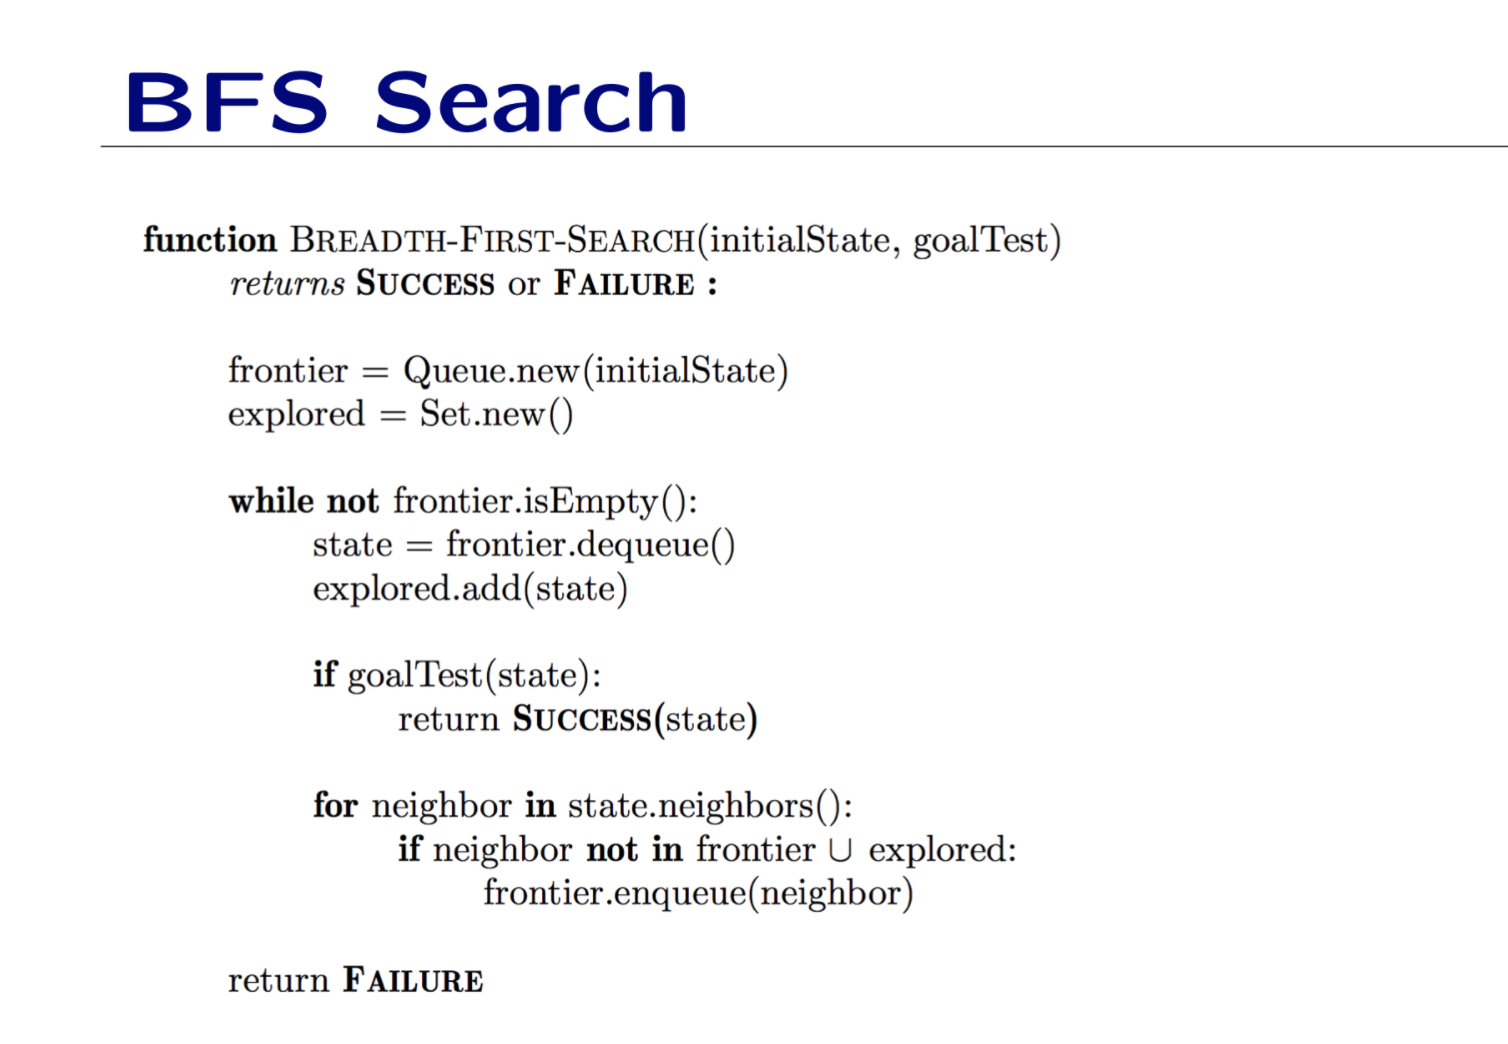

In [ ]:
def bfs_search(initial_state):
    """BFS search"""
    # BEGIN CODE
    frontier = Frontier("REPLACE")
    # END CODE

    frontier.put(initial_state)
    expanded = {tuple(initial_state.config)}

    while len(frontier):
        state = frontier.get()

        if test_goal(state):
            goal_node = state
            return goal_node

        for neighbor in state.expand():
            # BEGIN CODE

            # END CODE

In [ ]:
def test_goal(puzzle_state):
    """test the state is the goal state or not"""
    pass

In [ ]:
def backtracking(state):
    path = []
    while state.parent:
        path.append(state.action)
        state = state.parent
    return path[::-1]

In [ ]:
# Main Function that reads in Input and Runs corresponding Algorithm
def run_main(mode, grid):
    #search_mode = sys.argv[1].lower()
    #begin_state = sys.argv[2].split(",")
    search_mode = mode.lower()
    begin_state = grid.split(",")
    begin_state = list(map(int, begin_state))
    board_size  = int(math.sqrt(len(begin_state)))
    hard_state  = PuzzleState(begin_state, board_size)
    start_time  = time.time()
    
    if   search_mode == "bfs":
        goal_node = bfs_search(hard_state)
    elif search_mode == "ast":
        goal_node= = A_star_search(hard_state)
    else: 
        print("Enter valid command arguments !")

    path_to_goal = backtracking(goal_node)
    cost_of_path = goal_node.cost
    search_depth = goal_node.cost
    end_time = time.time()
    running_time = end_time - start_time

    writeOutput(
        path_to_goal,
        cost_of_path,
        search_depth,
    )
    print("Program completed in %.3f second(s)"%running_time)

In [ ]:
if __name__ == '__main__':
    run_main("bfs", "0,8,7,6,5,4,3,2,1")
    #run_main("bfs", "1,2,5,3,4,0,6,7,8")
    #run_main("bfs", "6,1,8,4,0,2,7,3,5")
    #run_main("bfs", "1,2,5,3,4,0,6,7,8")

A-Star Search: Use a priority queue. For the choice of heuristic, use the Manhattan priority function; that is, the sum of the distances of the tiles from their goal positions. Note that the blanks space is not considered an actual tile here.


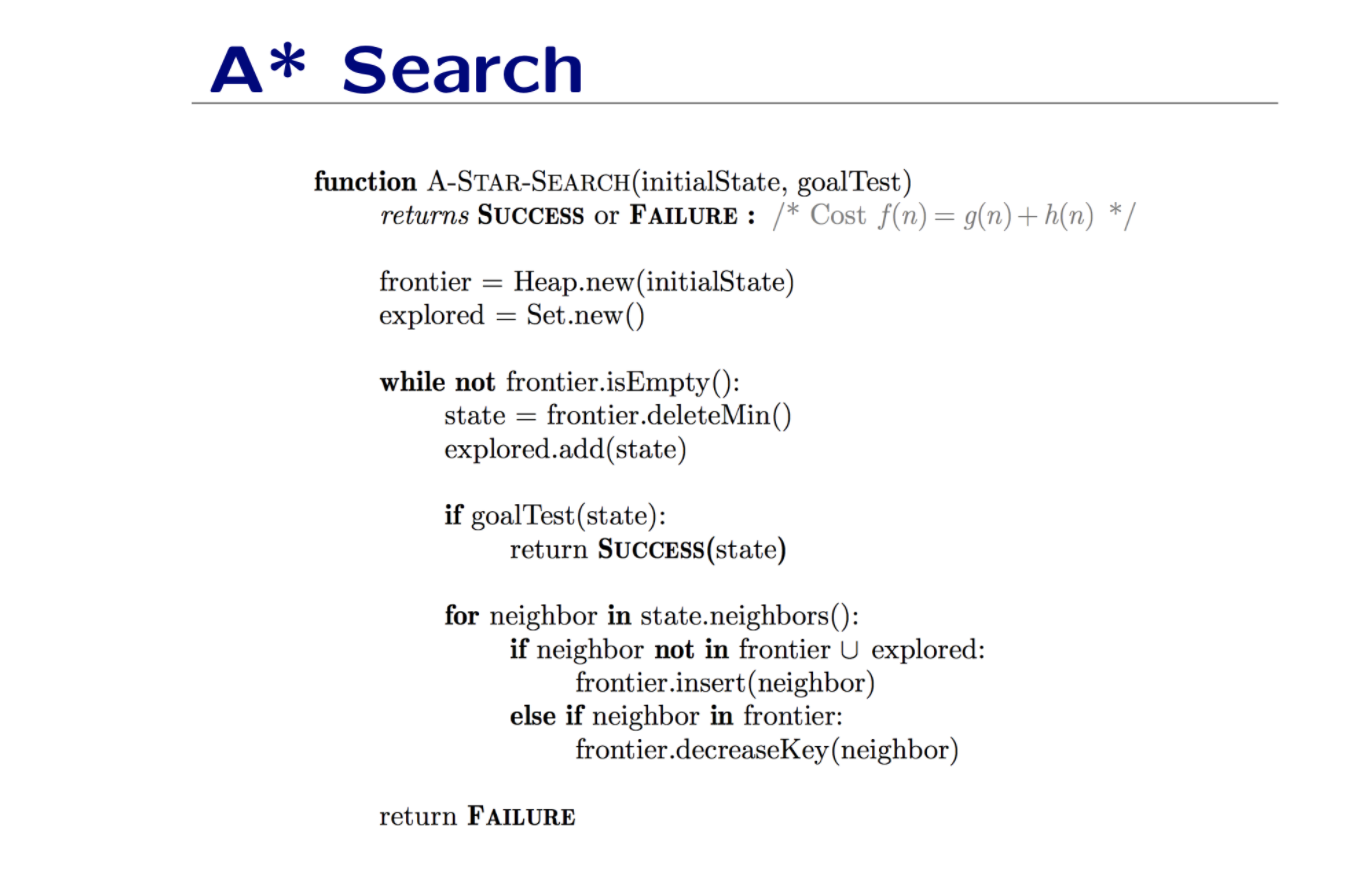

Since you are using a priority queue, what happens with duplicate keys? How do you ensure nodes are retrieved from the priority queue in the desired order?


In [ ]:
def calculate_total_cost(state):
    """calculate the total estimated cost of a state"""
    # heuristic cost is max manhattan distance as lower bound on number of steps needed

In [ ]:
def calculate_manhattan_dist(idx, value, n):
    """calculate the manhattan distance of a tile"""
    # distance of the value at the current position to its correct position
    # idx: index in self.config of tile currently looking at
    # value: value of tile at idx
    # turn list idx into corresponding grid coordinates:


In [ ]:
def A_star_search(initial_state):
    """A * search"""
    # BEGIN CODE
    frontier = Frontier("REPLACE")

    
    # priority is (cost+manhattan, UDLR, FIFO)
    frontier.put(())
    # END CODE
    explored = set()

    while len(frontier):
        _, _, _, state = frontier.get()
        if tuple(state.config) in explored:
            continue
        explored.add(tuple(state.config))

        if test_goal(state):
            goal_node = state
            return goal_node

        for neighbor in state.expand():
            if tuple(neighbor.config) not in explored:
                # BEGIN CODE
                frontier.put(())
                # END CODE

In [ ]:
if __name__ == '__main__':
    run_main("ast", "0,8,7,6,5,4,3,2,1")
    #run_main("ast", "1,2,5,3,4,0,6,7,8")
    #run_main("ast", "6,1,8,4,0,2,7,3,5")
    #run_main("ast", "1,2,5,3,4,0,6,7,8")